<a href="https://colab.research.google.com/github/Sidra2499/Data_Analysis_Projects/blob/Projects/Copy_of_LetsRock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.master("local").appName("GoogleColabSpark").getOrCreate()

In [ ]:
data = [("Sidra", 10), ("Samra", 20)]
columns = ["Name", "Numbers"]
df = spark.createDataFrame(data, columns)
data_collected = df.collect()
for row in data_collected:
    print(row)

Row(Name='Sidra', Numbers=10)
Row(Name='Samra', Numbers=20)


In [ ]:
from google.colab import files
unloaded = files.upload()



Saving youtube_subscribers_data.csv to youtube_subscribers_data.csv


In [ ]:
print(spark.version)

3.5.3


In [ ]:
df_youtube = spark.read.csv('youtube_subscribers_data.csv', header= True, inferSchema= True )
df_youtube.show()


+--------------------+-------------+----------------------+----------------+-------------+--------------------+
|                Name|Brand channel|Subscribers (millions)|Primary language|     Category|             Country|
+--------------------+-------------+----------------------+----------------+-------------+--------------------+
|             MrBeast|           No|                 335.0|         English|Entertainment|       United States|
|            T-Series|          Yes|                 280.0|           Hindi|        Music|               India|
|Cocomelon - Nurse...|          Yes|                 186.0|         English|    Education|       United States|
|           SET India|          Yes|                 180.0|           Hindi|Entertainment|               India|
|       Vlad and Niki|           No|                 129.0|         English|Entertainment|              Russia|
|     Kids Diana Show|          Yes|                 128.0|         English|Entertainment|United States 

In [ ]:
df_youtube.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Brand channel: string (nullable = true)
 |-- Subscribers (millions): double (nullable = true)
 |-- Primary language: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Country: string (nullable = true)



In [ ]:
df_youtube.describe().show()

+-------+---------------+-------------+----------------------+----------------+--------+--------------------+
|summary|           Name|Brand channel|Subscribers (millions)|Primary language|Category|             Country|
+-------+---------------+-------------+----------------------+----------------+--------+--------------------+
|  count|             50|           50|                    50|              50|      50|                  50|
|   mean|           NULL|         NULL|     90.96199999999999|            NULL|    NULL|                NULL|
| stddev|           NULL|         NULL|    53.066726921136286|            NULL|    NULL|                NULL|
|    min|5-Minute Crafts|           No|                  57.5|          Arabic|  Comedy|           Argentina|
|    max|   김프로KIMPRO|          Yes|                 335.0|            Urdu|  Sports|United States  Uk...|
+-------+---------------+-------------+----------------------+----------------+--------+--------------------+



In [ ]:
print("Number of Rows", df_youtube.count())
print("Number of Columns", len(df_youtube.columns))

Number of Rows 50
Number of Columns 6


In [ ]:
df_youtube.filter(df_youtube['Subscribers (millions)']>10).show()

+--------------------+-------------+----------------------+----------------+-------------+--------------------+
|                Name|Brand channel|Subscribers (millions)|Primary language|     Category|             Country|
+--------------------+-------------+----------------------+----------------+-------------+--------------------+
|             MrBeast|           No|                 335.0|         English|Entertainment|       United States|
|            T-Series|          Yes|                 280.0|           Hindi|        Music|               India|
|Cocomelon - Nurse...|          Yes|                 186.0|         English|    Education|       United States|
|           SET India|          Yes|                 180.0|           Hindi|Entertainment|               India|
|       Vlad and Niki|           No|                 129.0|         English|Entertainment|              Russia|
|     Kids Diana Show|          Yes|                 128.0|         English|Entertainment|United States 

In [ ]:
df_youtube.groupBy('Category').avg('Subscribers (millions)').show()

+--------------------+---------------------------+
|            Category|avg(Subscribers (millions))|
+--------------------+---------------------------+
|Education/Enterta...|                       60.2|
|           Education|                      106.5|
|       Entertainment|         101.26000000000002|
|              Sports|                      105.0|
|                Film|                       81.9|
|              How-to|                       81.1|
|     Lifestyle Vlogs|                       62.2|
|               Music|          83.77058823529413|
|Entertainment/Sports|                       71.3|
|              Comedy|                       60.6|
|                News|                       68.6|
+--------------------+---------------------------+



In [ ]:
df_youtube.groupBy('Category').sum('Subscribers (millions)').show()

+--------------------+---------------------------+
|            Category|sum(Subscribers (millions))|
+--------------------+---------------------------+
|Education/Enterta...|                       60.2|
|           Education|                      426.0|
|       Entertainment|         2025.2000000000003|
|              Sports|                      105.0|
|                Film|                      163.8|
|              How-to|                       81.1|
|     Lifestyle Vlogs|                       62.2|
|               Music|         1424.1000000000001|
|Entertainment/Sports|                       71.3|
|              Comedy|                       60.6|
|                News|                       68.6|
+--------------------+---------------------------+



In [ ]:
df_youtube.orderBy('Category',ascending=False).show()

+--------------------+-------------+----------------------+----------------+---------------+-------------+
|                Name|Brand channel|Subscribers (millions)|Primary language|       Category|      Country|
+--------------------+-------------+----------------------+----------------+---------------+-------------+
|                 WWE|          Yes|                 105.0|         English|         Sports|United States|
|             Aaj Tak|          Yes|                  68.6|           Hindi|           News|        India|
|T-Series Bhakti S...|          Yes|                  72.5|           Hindi|          Music|        India|
|           Zee Music|          Yes|                 112.0|           Hindi|          Music|        India|
|           Blackpink|           No|                  95.3|          Korean|          Music|  South Korea|
|           BANGTANTV|           No|                  79.4|          Korean|          Music|  South Korea|
|         Hybe Labels|          Yes| 

In [ ]:
df_youtube.fillna({'Subscribers (millions)':0}).show()

+--------------------+-------------+----------------------+----------------+-------------+--------------------+
|                Name|Brand channel|Subscribers (millions)|Primary language|     Category|             Country|
+--------------------+-------------+----------------------+----------------+-------------+--------------------+
|             MrBeast|           No|                 335.0|         English|Entertainment|       United States|
|            T-Series|          Yes|                 280.0|           Hindi|        Music|               India|
|Cocomelon - Nurse...|          Yes|                 186.0|         English|    Education|       United States|
|           SET India|          Yes|                 180.0|           Hindi|Entertainment|               India|
|       Vlad and Niki|           No|                 129.0|         English|Entertainment|              Russia|
|     Kids Diana Show|          Yes|                 128.0|         English|Entertainment|United States 

In [ ]:
from pyspark.sql.functions import when
df_youtube = df_youtube.withColumn("Channel Size", when(df_youtube['Subscribers (millions)']>100,"Large" ).when((df_youtube['Subscribers (millions)']<=100) & (df_youtube['Subscribers (millions)']>60), "Medium").otherwise("Small"))

df_youtube.show()



+--------------------+-------------+----------------------+----------------+-------------+--------------------+------------+
|                Name|Brand channel|Subscribers (millions)|Primary language|     Category|             Country|Channel Size|
+--------------------+-------------+----------------------+----------------+-------------+--------------------+------------+
|             MrBeast|           No|                 335.0|         English|Entertainment|       United States|       Large|
|            T-Series|          Yes|                 280.0|           Hindi|        Music|               India|       Large|
|Cocomelon - Nurse...|          Yes|                 186.0|         English|    Education|       United States|       Large|
|           SET India|          Yes|                 180.0|           Hindi|Entertainment|               India|       Large|
|       Vlad and Niki|           No|                 129.0|         English|Entertainment|              Russia|       Large|


In [ ]:
df_youtube.select("Name", "Subscribers (millions)", "Channel Size").show()

+--------------------+----------------------+------------+
|                Name|Subscribers (millions)|Channel Size|
+--------------------+----------------------+------------+
|             MrBeast|                 335.0|       Large|
|            T-Series|                 280.0|       Large|
|Cocomelon - Nurse...|                 186.0|       Large|
|           SET India|                 180.0|       Large|
|       Vlad and Niki|                 129.0|       Large|
|     Kids Diana Show|                 128.0|       Large|
|         Like Nastya|                 123.0|       Large|
|           Zee Music|                 112.0|       Large|
|           PewDiePie|                 110.0|       Large|
|                 WWE|                 105.0|       Large|
|           Goldmines|                 101.0|       Large|
|        Stokes Twins|                 100.0|      Medium|
|            Sony SAB|                  97.5|      Medium|
|           Blackpink|                  95.3|      Mediu

In [ ]:
df_youtube.groupBy("Channel Size").count().show()

+------------+-----+
|Channel Size|count|
+------------+-----+
|      Medium|   34|
|       Small|    5|
|       Large|   11|
+------------+-----+



In [ ]:
import matplotlib.pyplot as plt

  Channel Size  count
0       Medium     34
1        Small      5
2        Large     11


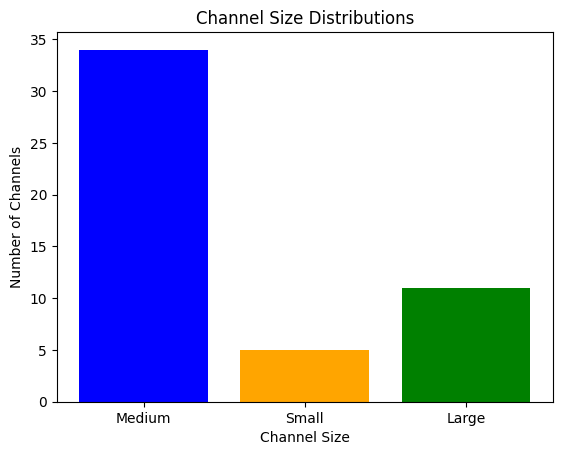

In [ ]:
channel_size_distributions = df_youtube.groupBy('Channel Size').count().toPandas()
print(channel_size_distributions)
plt.bar(channel_size_distributions['Channel Size'],channel_size_distributions['count'],color=[ "blue","orange","green"])
plt.xlabel("Channel Size")
plt.ylabel("Number of Channels")
plt.title("Channel Size Distributions")
plt.show()

In [ ]:
df_youtube.write.csv("updated_youtube_data2.csv", header= True)


In [ ]:
!zip -r updated_youtube_data2.zip updated_youtube_data2.csv
from google.colab import files
files.download("updated_youtube_data.csv")

	zip warning: name not matched: updated_youtube_data2.csv

zip error: Nothing to do! (try: zip -r updated_youtube_data2.zip . -i updated_youtube_data2.csv)


FileNotFoundError: Cannot find file: updated_youtube_data.csv